# Task 9

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = np.load('Data/circle_data_2.npy')

# Transpose data and populate
points = data.T
x_points = points[:, 0]
y_points = points[:, 1]

In [3]:
# Construct the A matrix and b vector for least-squares
N = len(points)
A = np.ones((N, 3))
b = np.zeros(N)

for i in range(N):
    x = x_points[i]
    y = y_points[i]
    A[i, 1] = -2 * x
    A[i, 2] = -2 * y
    b[i] = -(x**2 + y**2)

A

array([[ 1.        ,  0.60721856, -2.60408459],
       [ 1.        ,  0.33982651, -4.38092575],
       [ 1.        ,  1.16049453, -3.36620147],
       [ 1.        , -0.0780188 , -2.4253186 ],
       [ 1.        ,  2.17924904, -4.05486258],
       [ 1.        ,  1.69231062, -3.64585752],
       [ 1.        ,  0.5766407 , -3.61049075],
       [ 1.        ,  1.60545435, -3.49810561],
       [ 1.        , -0.284779  , -2.16366008],
       [ 1.        , -0.31581394, -1.78224265],
       [ 1.        , -0.58372803, -2.94724784],
       [ 1.        ,  0.75580651, -2.2883948 ],
       [ 1.        ,  0.29504014, -2.58004499],
       [ 1.        ,  1.52593379, -4.30074077],
       [ 1.        ,  0.65641337, -3.5243452 ],
       [ 1.        , -0.07201994, -2.46427999],
       [ 1.        ,  2.34062549, -4.00511344],
       [ 1.        ,  0.12565157, -1.76100424],
       [ 1.        ,  0.45167276, -3.42321379],
       [ 1.        , -0.27008116, -2.01015738],
       [ 1.        ,  1.24274947, -4.537

LS Center: (-0.44638223865993254, 1.5046108362414894)
LS Radius: 0.5930429544769914


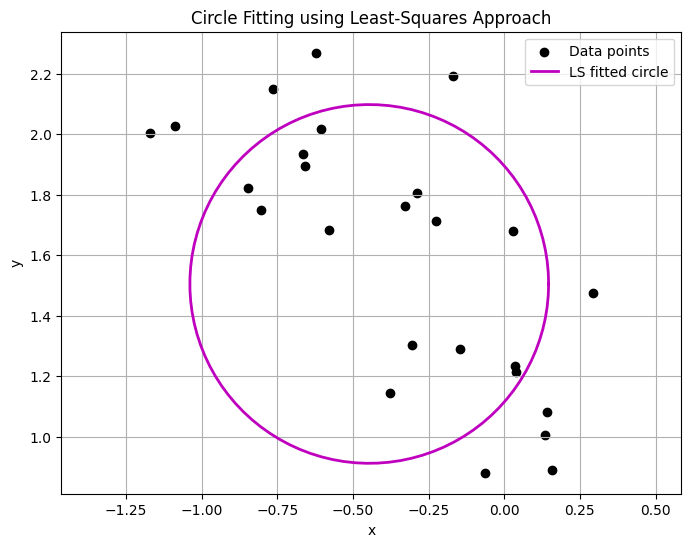

In [4]:
# Solve the least-squares problem
solution, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

# Extract the solution
y_star = solution[0]
c_ls_x = solution[1]
c_ls_y = solution[2]
c_ls = np.array([c_ls_x, c_ls_y])

# Calculate the radius
R_ls = np.sqrt(np.linalg.norm(c_ls)**2 - y_star)

print(f"LS Center: ({c_ls_x}, {c_ls_y})")
print(f"LS Radius: {R_ls}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(x_points, y_points, color='black', label='Data points')

# Plot the fitted circle
theta_plot = np.linspace(0, 2*np.pi, 100)
circle_x = c_ls_x + R_ls * np.cos(theta_plot)
circle_y = c_ls_y + R_ls * np.sin(theta_plot)
plt.plot(circle_x, circle_y, 'm-', linewidth=2, label='LS fitted circle')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Circle Fitting using Least-Squares Approach')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [5]:
# LEVENBERG-MARQUARDT ALGORITHM 
print("\n=== LEVENBERG-MARQUARDT ALGORITHM ===")

# Initialize parameters for LM
theta = np.array([c_ls_x, c_ls_y, R_ls])  # [c_x, c_y, R]
lambda_val = 1.0
epsilon = 1e-6
max_iter = 100

grad_norms = []
costs = []


=== LEVENBERG-MARQUARDT ALGORITHM ===


In [ ]:
for iter in range(max_iter):
    # Compute residuals 
    r = np.zeros((N, 1))  
    for i in range(N):
        dist = np.linalg.norm(points[i] - theta[:2])
        r[i, 0] = dist - theta[2]  # Store as 2D array
    
    # Compute current cost
    current_cost = float(r.T @ r)  # Equivalent to f_p.T @ f_p
    costs.append(current_cost)
    
    # Compute Jacobian 
    J = np.zeros((N, 3))
    for i in range(N):
        dist = np.linalg.norm(points[i] - theta[:2])
        if dist > 1e-12:
            J[i, 0] = (theta[0] - points[i, 0]) / dist  # ∂r/∂c_x
            J[i, 1] = (theta[1] - points[i, 1]) / dist  # ∂r/∂c_y
        J[i, 2] = -1  # ∂r/∂R
    
    # Compute gradient 
    gradient = 2 * J.T @ r  # This is J^T @ r * 2
    grad_norm = np.linalg.norm(gradient)
    grad_norms.append(grad_norm)
    
    print(f"Iteration {iter+1}: Cost = {current_cost:.6f}, Grad Norm = {grad_norm:.6f}")
    
    # Check convergence
    if grad_norm < epsilon:
        print("Converged!")
        break
    
    # LM update step - using augmented system approach
    while True:
        # Build augmented system 
        sqrt_lambda = np.sqrt(lambda_val)
        A_aug = np.vstack([J, sqrt_lambda * np.eye(3)])  # [J; √λI]
        
        # Build b vector: [J@theta - r; √λ@theta]
        theta_vec = theta.reshape(3, 1)  # Convert to column vector
        b_aug = np.vstack([J @ theta_vec - r, sqrt_lambda * theta_vec])
        
        # Solve the augmented system
        theta_new_vec, *_ = np.linalg.lstsq(A_aug, b_aug, rcond=None)
        theta_new = theta_new_vec.flatten()  # Convert back to 1D array
        
        # Compute new cost
        new_r = np.zeros((N, 1))
        for i in range(N):
            dist = np.linalg.norm(points[i] - theta_new[:2])
            new_r[i, 0] = dist - theta_new[2]
        new_cost = float(new_r.T @ new_r)
        
        if new_cost < current_cost:
            # Accept update 
            theta = theta_new
            lambda_val = max(lambda_val * 0.7, 1e-12)
            break
        else:
            # Reject update 
            lambda_val = lambda_val * 2 
            if lambda_val > 1e12:
                print("Lambda too large, breaking")
                break

Iteration 1: Cost = 1.053504, Grad Norm = 2.161303
Iteration 2: Cost = 0.987360, Grad Norm = 0.422571
Iteration 3: Cost = 0.967962, Grad Norm = 0.327727
Iteration 4: Cost = 0.953291, Grad Norm = 0.260773
Iteration 5: Cost = 0.941594, Grad Norm = 0.211165
Iteration 6: Cost = 0.931937, Grad Norm = 0.173425
Iteration 7: Cost = 0.923780, Grad Norm = 0.143445
Iteration 8: Cost = 0.916878, Grad Norm = 0.118064
Iteration 9: Cost = 0.911208, Grad Norm = 0.095361
Iteration 10: Cost = 0.906838, Grad Norm = 0.074726
Iteration 11: Cost = 0.903762, Grad Norm = 0.056478
Iteration 12: Cost = 0.901815, Grad Norm = 0.041212
Iteration 13: Cost = 0.900707, Grad Norm = 0.029212
Iteration 14: Cost = 0.900134, Grad Norm = 0.020241
Iteration 15: Cost = 0.899860, Grad Norm = 0.013749
Iteration 16: Cost = 0.899738, Grad Norm = 0.009163
Iteration 17: Cost = 0.899685, Grad Norm = 0.006000
Iteration 18: Cost = 0.899664, Grad Norm = 0.003871
Iteration 19: Cost = 0.899655, Grad Norm = 0.002469
Iteration 20: Cost = 

/tmp/ipykernel_134868/164540508.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_cost = float(r.T @ r)  # Equivalent to f_p.T @ f_p
/tmp/ipykernel_134868/164540508.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_cost = float(new_r.T @ new_r)


In [7]:
# Extract LM results
c_lm_x, c_lm_y, R_lm = theta
print(f"\nLM Center: ({c_lm_x:.4f}, {c_lm_y:.4f})")
print(f"LM Radius: {R_lm:.4f}")


LM Center: (-0.8792, 1.1044)
LM Radius: 0.9086


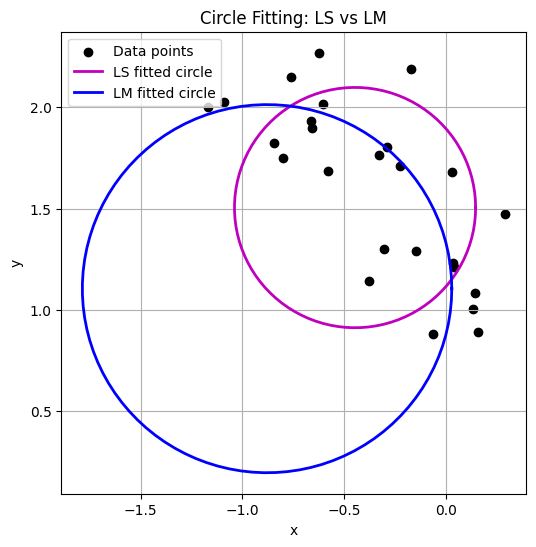

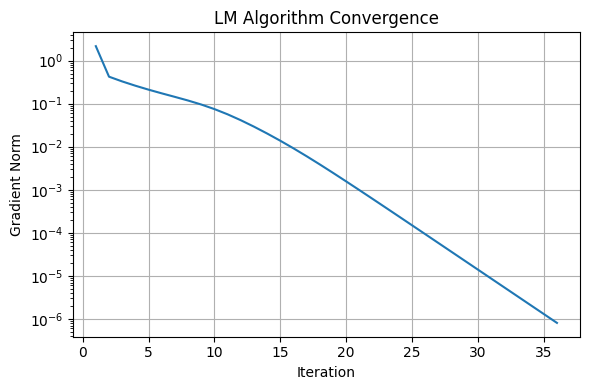

In [8]:
# Plot 1: Data with both circles
plt.figure(figsize=(6, 6))
plt.scatter(x_points, y_points, color='black', label='Data points')

# Plot LS circle
circle_ls_x = c_ls_x + R_ls * np.cos(theta_plot)
circle_ls_y = c_ls_y + R_ls * np.sin(theta_plot)
plt.plot(circle_ls_x, circle_ls_y, 'm-', linewidth=2, label='LS fitted circle')

# Plot LM circle
circle_lm_x = c_lm_x + R_lm * np.cos(theta_plot)
circle_lm_y = c_lm_y + R_lm * np.sin(theta_plot)
plt.plot(circle_lm_x, circle_lm_y, 'b-', linewidth=2, label='LM fitted circle')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Circle Fitting: LS vs LM')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Plot 2: Gradient norm across iterations
plt.figure(figsize=(6, 4))
plt.semilogy(range(1, len(grad_norms) + 1), grad_norms)
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('LM Algorithm Convergence')
plt.grid(True)
plt.yscale('log')

plt.tight_layout()
plt.show()

In [9]:
grad_norms

[np.float64(2.161303071914544),
 np.float64(0.4225707949620133),
 np.float64(0.32772724252872015),
 np.float64(0.260773482375267),
 np.float64(0.21116527675228186),
 np.float64(0.17342499301553163),
 np.float64(0.1434449701385361),
 np.float64(0.1180643818579305),
 np.float64(0.09536069198845536),
 np.float64(0.0747259370492491),
 np.float64(0.05647828841153265),
 np.float64(0.04121226482203989),
 np.float64(0.02921208558008248),
 np.float64(0.02024059187116797),
 np.float64(0.013749104428258321),
 np.float64(0.00916343632072758),
 np.float64(0.006000364381867895),
 np.float64(0.0038710868427828606),
 np.float64(0.0024688799990174597),
 np.float64(0.001561572101855863),
 np.float64(0.0009820451203272932),
 np.float64(0.0006152131311202568),
 np.float64(0.0003844266536878274),
 np.float64(0.00023981613887386874),
 np.float64(0.00014944228250524235),
 np.float64(9.306021197932353e-05),
 np.float64(5.7923831725308486e-05),
 np.float64(3.604313858621442e-05),
 np.float64(2.2423573697877695